Install necessary libraries

In [ ]:
!pip install wordcloud matplotlib seaborn nltk

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Read the dataset

In [ ]:
file_path = '/content/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Clean the dataset

In [ ]:

data_clean = data.iloc[:, [0, -1]]

data_clean.columns = ['Sentiment', 'Text']

data_clean.head()


,Sentiment,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


Text cleaning function

In [ ]:

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphabetic characters (i.e., special characters, numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

data_clean['Cleaned_Text'] = data_clean['Text'].apply(clean_text)

data_clean.head()


<ipython-input-6-f1bfdad2371a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cleaned_Text'] = data_clean['Text'].apply(clean_text)


,Sentiment,Text,Cleaned_Text
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...
4,0,@Kwesidei not the whole crew,not the whole crew


Visualize the distribution of tweet lengths

<ipython-input-7-a013585ef0ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Text_Length'] = data_clean['Cleaned_Text'].apply(len)


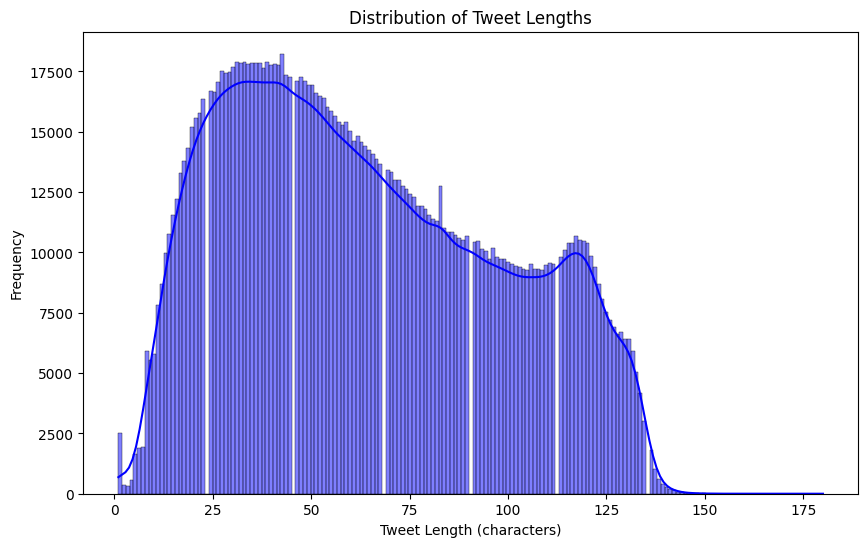

In [ ]:
data_clean['Text_Length'] = data_clean['Cleaned_Text'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Text_Length'], kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()


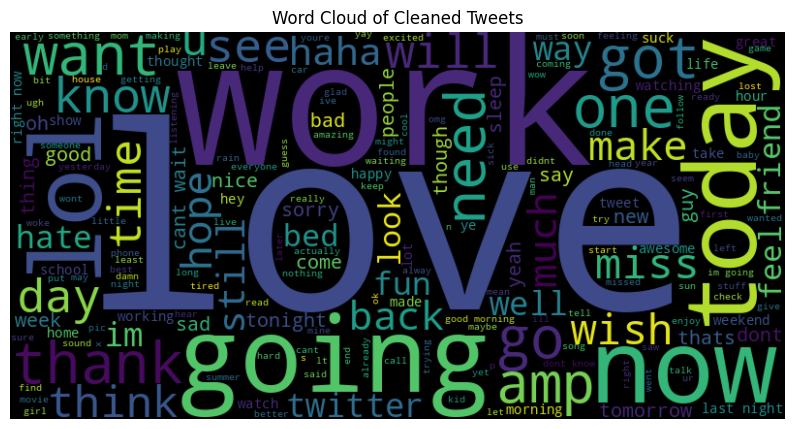

<ipython-input-8-10df93f1f303>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cleaned_Text_No_Stopwords'] = data_clean['Cleaned_Text'].apply(remove_stopwords)


,Sentiment,Text,Cleaned_Text,Text_Length,Cleaned_Text_No_Stopwords
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,105,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,76,dived many times ball managed save rest go bounds
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,87,behaving im mad cant see
4,0,@Kwesidei not the whole crew,not the whole crew,20,whole crew


In [ ]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data_clean['Cleaned_Text']))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Cleaned Tweets')
plt.show()

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stopwords and split the text into tokens (words)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal
data_clean['Cleaned_Text_No_Stopwords'] = data_clean['Cleaned_Text'].apply(remove_stopwords)

# Display the cleaned text after removing stopwords
data_clean.head()



EDA

<ipython-input-9-b3a1c6e2f055>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x='Sentiment', palette='viridis')


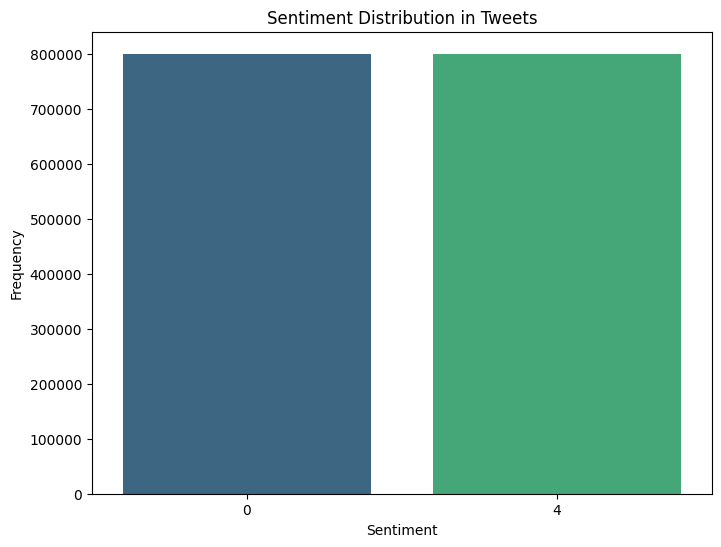

In [ ]:
# Sentiment Distribution Visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


Word Frequency Visualization

<ipython-input-10-d61efe50d6d4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_d')


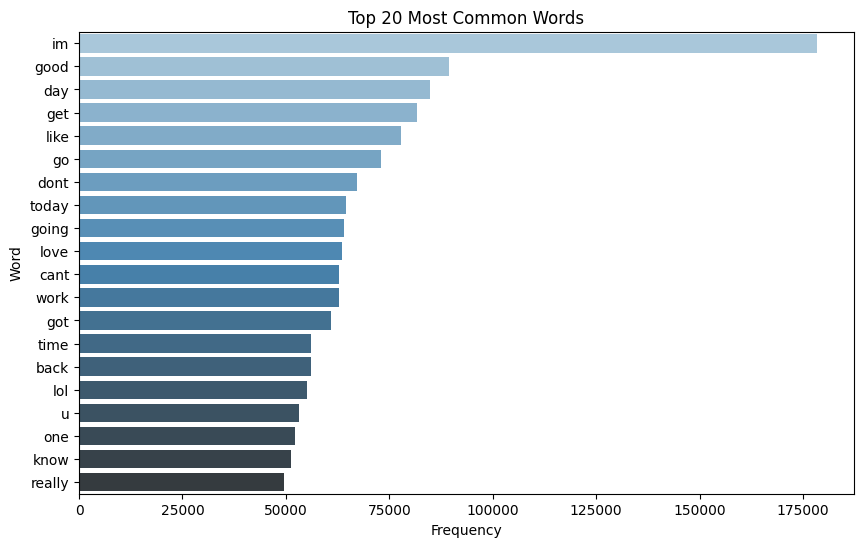

In [ ]:
from collections import Counter

# Step 2.2: Word Frequency Visualization
all_words = ' '.join(data_clean['Cleaned_Text_No_Stopwords']).split()
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Create a dataframe for better visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_d')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


Text Length Distribution and Visualizing Sentiment vs Tweet Length

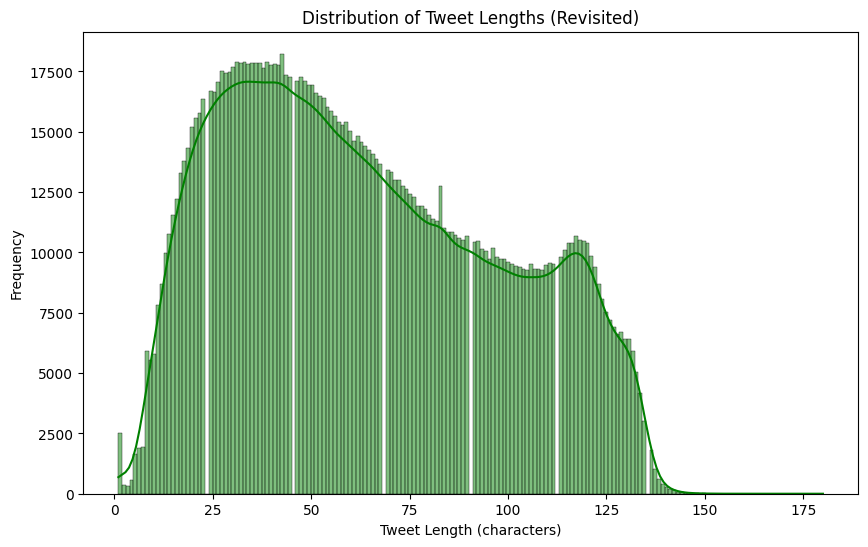

<ipython-input-11-2b0834dfa592>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Text_Length', data=data_clean, palette='Set2')


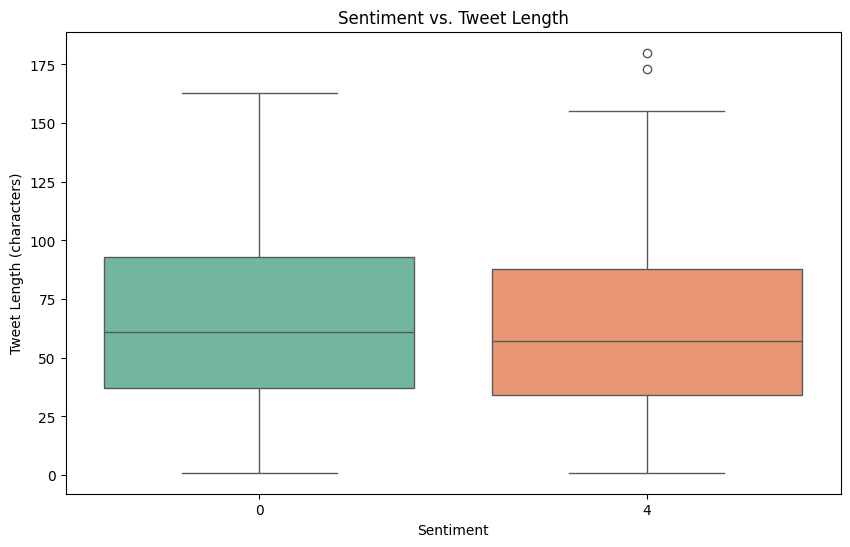

In [ ]:
# Step 2.3: Text Length Distribution (Revisited)
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Text_Length'], kde=True, color='green')
plt.title('Distribution of Tweet Lengths (Revisited)')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Step 2.4: Visualizing Sentiment vs Tweet Length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=data_clean, palette='Set2')
plt.title('Sentiment vs. Tweet Length')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.show()

Most Common Positive/Negative Words

<ipython-input-12-3a98e7208218>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=positive_words_df, palette='Greens_d', ax=axes[0])
<ipython-input-12-3a98e7208218>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=negative_words_df, palette='Reds_d', ax=axes[1])


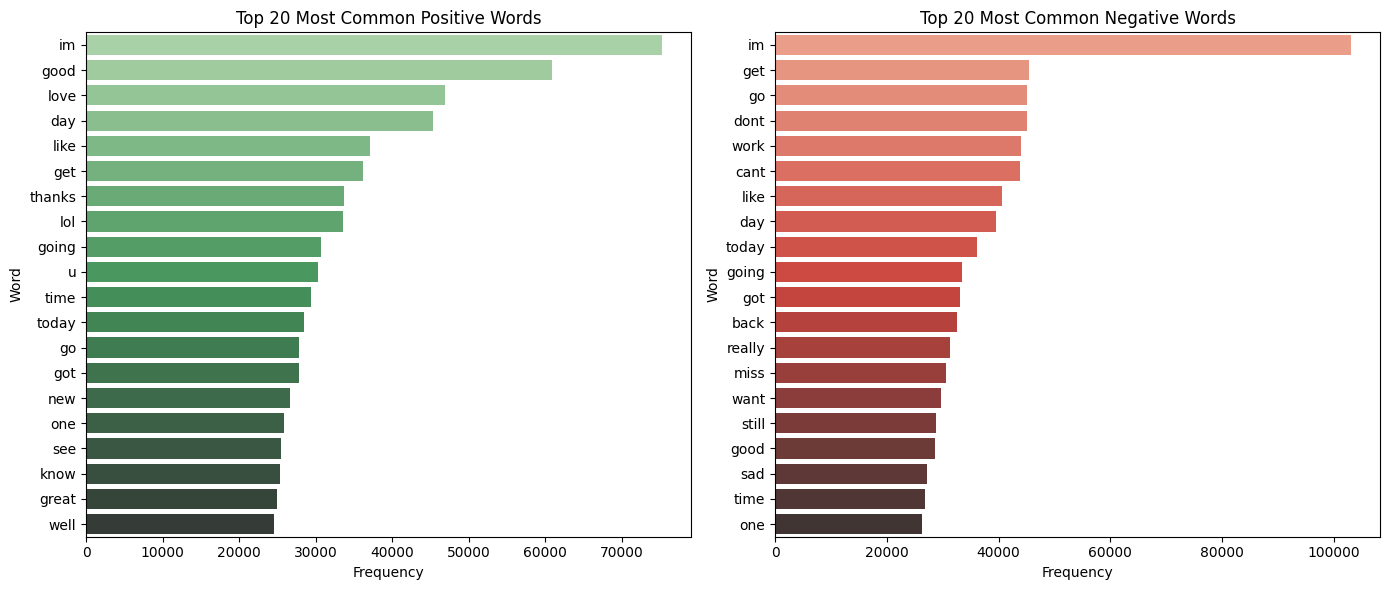

In [ ]:
# Step 2.5: Most Common Words in Positive and Negative Sentiments
positive_tweets = data_clean[data_clean['Sentiment'] == 4]  # Assuming '4' is positive sentiment
negative_tweets = data_clean[data_clean['Sentiment'] == 0]  # Assuming '0' is negative sentiment

# Get most common words for positive and negative sentiments
positive_words = ' '.join(positive_tweets['Cleaned_Text_No_Stopwords']).split()
negative_words = ' '.join(negative_tweets['Cleaned_Text_No_Stopwords']).split()

positive_word_freq = Counter(positive_words).most_common(20)
negative_word_freq = Counter(negative_words).most_common(20)

# Create dataframes for visualization
positive_words_df = pd.DataFrame(positive_word_freq, columns=['Word', 'Frequency'])
negative_words_df = pd.DataFrame(negative_word_freq, columns=['Word', 'Frequency'])

# Plot the most common words for both positive and negative sentiments
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Frequency', y='Word', data=positive_words_df, palette='Greens_d', ax=axes[0])
sns.barplot(x='Frequency', y='Word', data=negative_words_df, palette='Reds_d', ax=axes[1])

axes[0].set_title('Top 20 Most Common Positive Words')
axes[1].set_title('Top 20 Most Common Negative Words')

plt.tight_layout()
plt.show()


Feature Engineering & Model Training

TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3.1: Vectorize the cleaned text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the text data into numerical features
X = tfidf_vectorizer.fit_transform(data_clean['Cleaned_Text_No_Stopwords'])

# The target variable (Sentiment)
y = data_clean['Sentiment']

# Check the shape of the resulting feature matrix
X.shape


(1599999, 5000)

Splitting the Data (Train/Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# Step 3.2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
X_train.shape, X_test.shape


((1279999, 5000), (320000, 5000))

Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 3.3: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 3.4: Predict the sentiments on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.765775

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           4       0.75      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



Model Evaluation

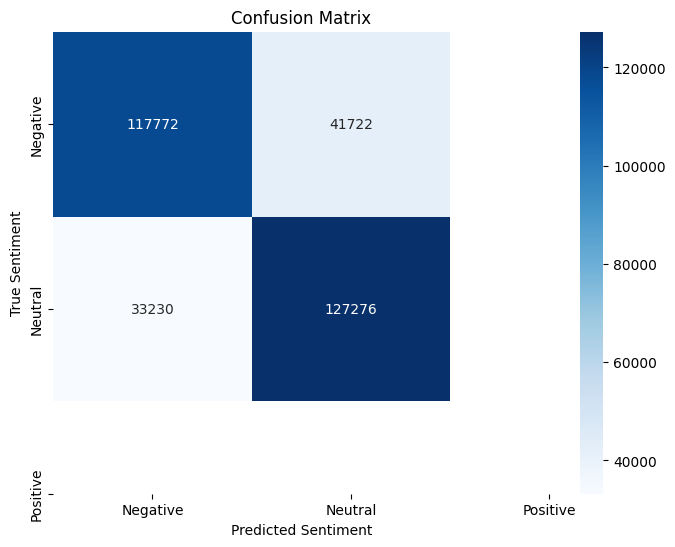

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 3.5: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()


Model Evaluation and Improvement

Evaluate the Model Performance

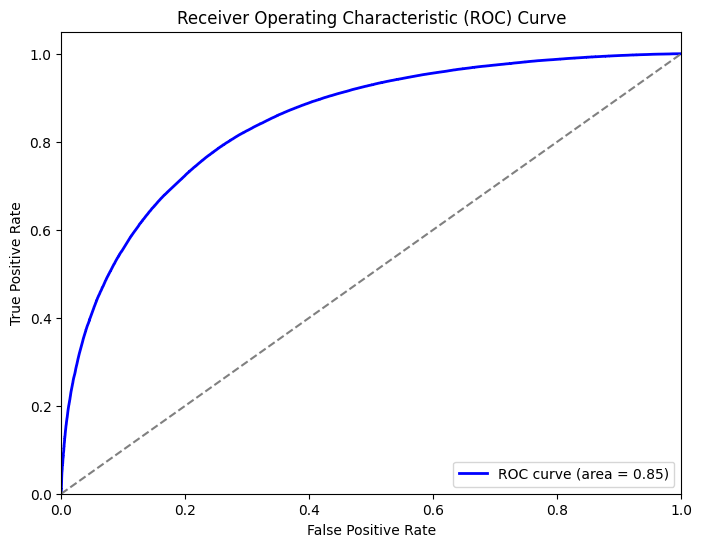

F1 Score: 0.7655902293613237
Precision Score: 0.7664866123736118
Recall Score: 0.765775


In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score

# Step 4.1: Calculate and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=4)  # Assuming 4 is the positive sentiment

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 4.2: Additional metrics
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 4.3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'max_iter': [1000, 2000],  # Maximum iterations for convergence
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report of Best Model:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'max_iter': 1000}
Best Cross-Validation Accuracy: 0.7650146602348789
Accuracy of Best Model: 0.765775

Classification Report of Best Model:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           4       0.75      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

